In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model

# Data Exploration

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
len(train_df.columns)

81

1. There are over 81 columns in this dataframe, let's use pandas to get a feel for the data.
1. Assess how many datatypes there are in the frame. 
1. Which are categorical and which are numerical?
1. How can we get some simple desciptive statistics?

In [6]:
#read data_description.txt
with open('data_description.txt') as f:
    for i in range(500):
        line = f.readline()
        print(line)
f.close()
print('...')

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [7]:
print('The dtypes of columns and frequencies:')
train_df.dtypes.value_counts()

The dtypes of columns and frequencies:


object     43
int64      35
float64     3
dtype: int64

In [8]:
train_df['MSSubClass'].dtype #what type should this be?

dtype('int64')

In [9]:
train_df['MSSubClass'] = train_df['MSSubClass'].astype(np.object); train_df['MSSubClass'].dtype

dtype('O')

In [10]:
categorical_features = train_df.loc[:, train_df.dtypes == np.object]
numerical_features = train_df.loc[:, train_df.dtypes != np.object]

In [11]:
numerical_features.describe() #are any of these unusual?

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Visualisations

In [12]:
sns.set_style("darkgrid")


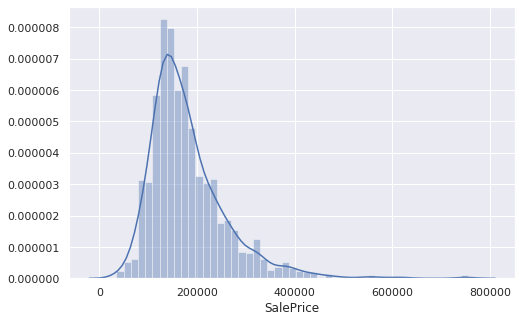

In [13]:
sns.set() #for default style

f, ax = plt.subplots(figsize=(8,5))
fig = sns.distplot(train_df['SalePrice'])
plt.show()

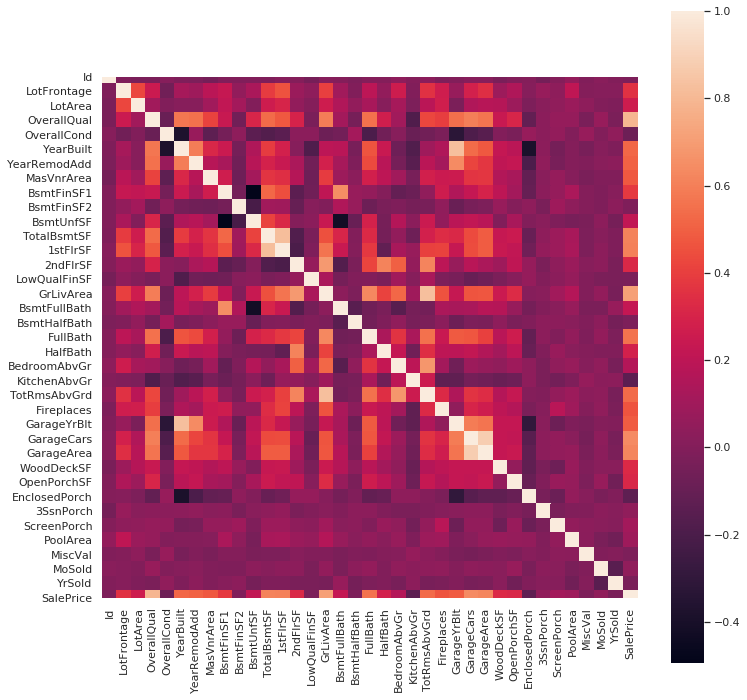

In [14]:
corr_df = train_df.corr(method = 'pearson') 
f, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(data=corr_df, vmax = 1.0, square=True)
plt.show()

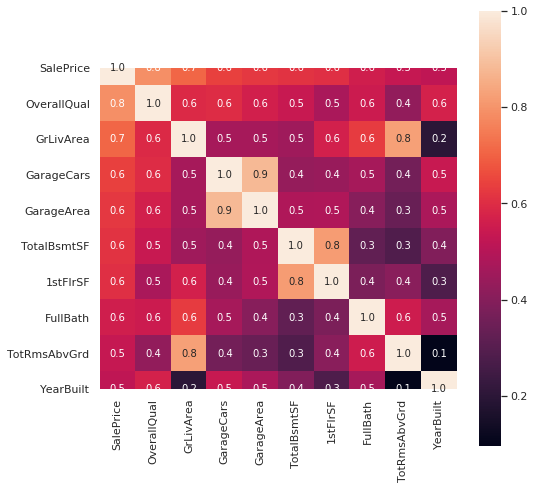

In [15]:
n = 10
cols = corr_df.nlargest(n, 'SalePrice')['SalePrice'].index # filter for top 10 correlations
cm = corr_df.loc[cols, cols]
sns.set(font_scale = 1.0)
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

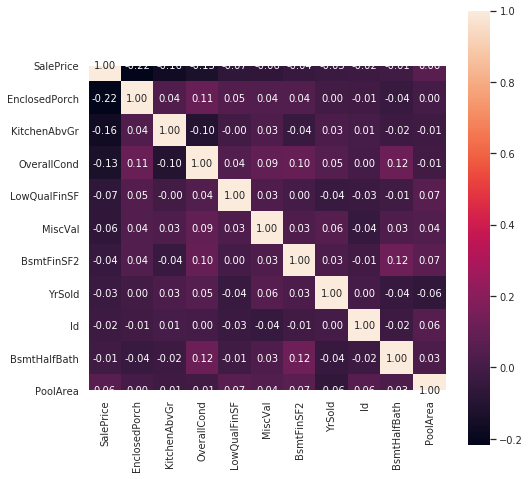

In [16]:
neg_corr_df = train_df.corr(method='spearman')
n = 10 
cols = ['SalePrice'] + list(neg_corr_df.nsmallest(n, 'SalePrice')['SalePrice'].index)

cm = neg_corr_df.loc[cols,cols]
plt.figure(figsize=(8,8))
sns.set(font_scale = 0.9)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols, xticklabels=cols)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


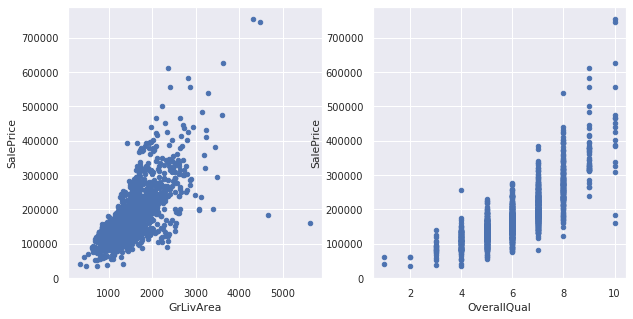

In [17]:
fig, a = plt.subplots(1,2,figsize=(10,5))
train_df.plot.scatter(x = 'GrLivArea', y='SalePrice', ax=a[0]) 
train_df.plot.scatter(x = 'OverallQual', y='SalePrice', ax=a[1]) 
plt.show()

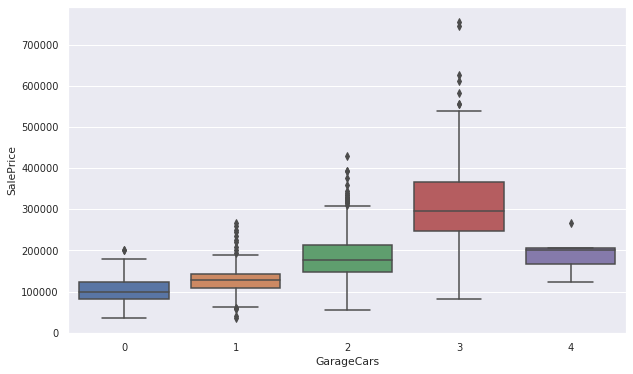

In [18]:
var = 'GarageCars'
temp = train_df.loc[:, ['SalePrice', var]]
f, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x=var, y='SalePrice', data=temp)
plt.show()

## Missing Data

In [19]:
n = len(train_df)
num_miss = train_df.isnull().sum(axis=0)
percent_miss = (num_miss / n)

miss_info = pd.concat([num_miss, percent_miss, train_df.dtypes], axis=1, keys=['number_missing', 'percent_missing', 'dtype'])
miss_info = miss_info.sort_values(by=['number_missing'], ascending=False)
miss_info.loc[miss_info['number_missing']>0]

,number_missing,percent_missing,dtype
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageYrBlt,81,0.055479,float64
GarageCond,81,0.055479,object
GarageType,81,0.055479,object
GarageFinish,81,0.055479,object


Our strategy: for categorical variables, leave as is (because we will encode them as missing easily as just another category). For numerical variables, we will in the missing variables with the median.

In [20]:
booarr = np.logical_and(miss_info['number_missing']>0, miss_info['dtype']!= np.object)
miss_numeric_cols = list(miss_info.loc[booarr].index)
print('Median:\n', train_df[miss_numeric_cols].median())
print('Mean:\n', train_df[miss_numeric_cols].mean())
for c in miss_numeric_cols:
    train_df[c] = train_df[c].fillna(value = train_df[c].median()) #fill with the median value

print('\n\nCheck there\'s no more missing values:')
train_df[miss_numeric_cols].isnull().sum()

Median:
 LotFrontage      69.0
GarageYrBlt    1980.0
MasVnrArea        0.0
dtype: float64
Mean:
 LotFrontage      70.049958
GarageYrBlt    1978.506164
MasVnrArea      103.685262
dtype: float64


Check there's no more missing values:


LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

## Outliers

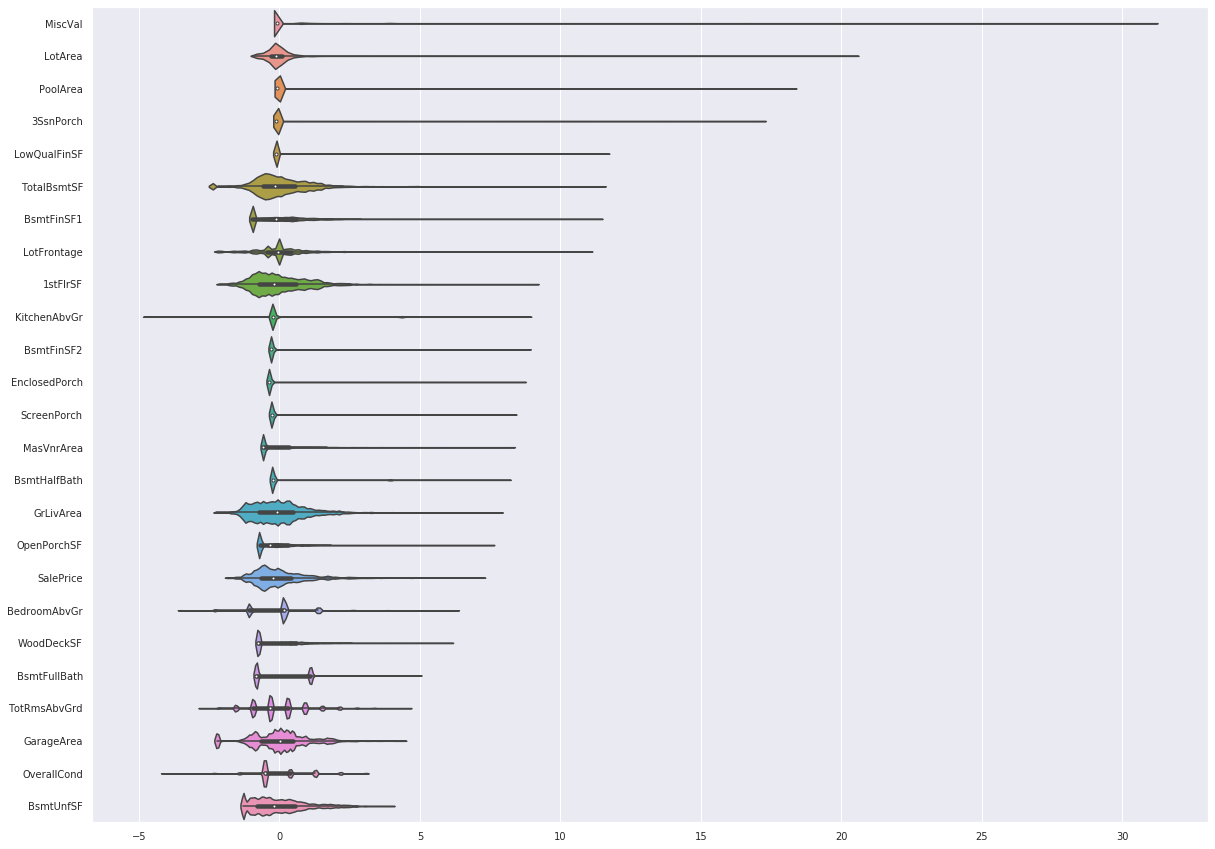

In [21]:
#Get the numerical features
numeric_df = train_df.loc[:, train_df.dtypes != np.object]
#Standardize by subtractin mean and dividing standard deviation
mu = numeric_df.mean()
sd = numeric_df.std()
scaled_df = (numeric_df - mu)/sd

#Showing the features with data more than 4 s.d. away from the mean
outl = scaled_df.abs().max(axis=0).sort_values(ascending=False)
outl = outl[outl>4]

f, ax = plt.subplots(figsize=(20,15))
outlfig = sns.violinplot(data = scaled_df[outl.index], orient='h', scale='count', bw=0.05)
plt.show()

Let's look closer at the PoolArea - it has an arrow shape which suggest further investigation into whether outliers are due to bad data. 

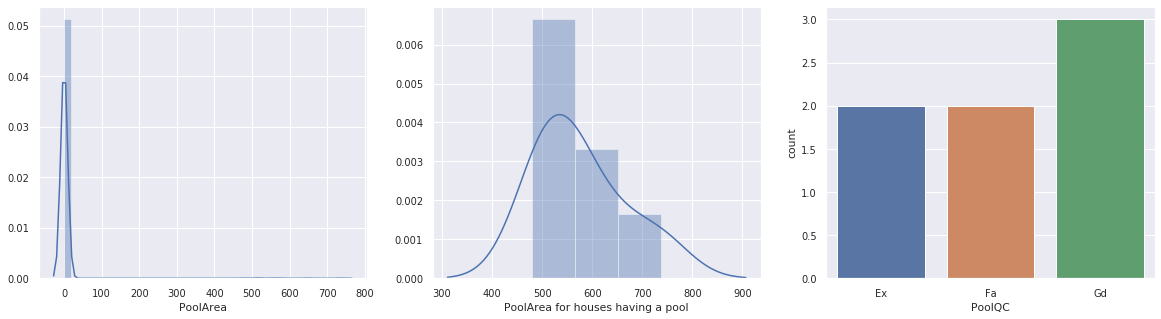

In [22]:
fig, a = plt.subplots(1,3,figsize=(20,5))

dfHavePool = train_df.loc[train_df['PoolArea']>0 , 'PoolArea']
sns.distplot(train_df['PoolArea'], ax=a[0])
sns.distplot(dfHavePool,axlabel='PoolArea for houses having a pool', ax=a[1])
sns.countplot(train_df['PoolQC'], ax=a[2])
plt.show()

# Feature Engineering

## Categorical feature encoding

In [24]:
train_df_cat = categorical_features 
print('Number of original categorical columns:', len(train_df_cat.columns))

train_df_cat = pd.get_dummies(train_df_cat, dummy_na=True) #convert the categorical features into ohe vector
print('Number of new columns:', len(train_df_cat.columns))
print('Training set size:', len(train_df_cat))
train_df_cat.head(5)

Number of original categorical columns: 44
Number of new columns: 311
Training set size: 1460


,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## Feature Transformations

LINE, 4 assumptions of linear regression:
1. Linearity: the dependent variable should be a linear function of the transformed features + error term
1. Independence: the error terms are independent from each other
1. Normality: the error terms are normally distributed with mean 0 (ie. the residuals)
1. Equal variance: the variance of the error term is constant for different predictor variables

How do we transform variables?
1. Trial and error
1. Have a neural network learn the necessary non-linear functions by which to transform the data.


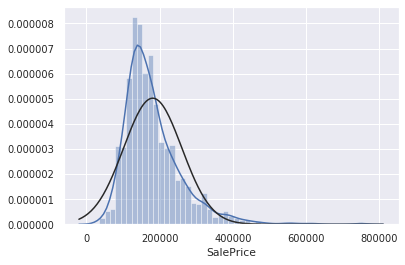

In [25]:
from scipy.stats import norm

#Is the dependent variable normally distributed? (ie. N)
fig = sns.distplot(train_df['SalePrice'], fit = norm)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


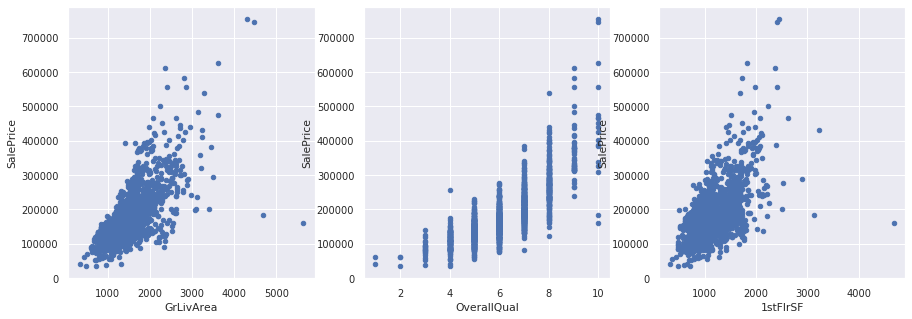

In [26]:
# Is the variance constant for different values of variables 
fig, a = plt.subplots(1,3,figsize=(15,5))
train_df.plot.scatter(x = 'GrLivArea', y='SalePrice', ax=a[0]) 
train_df.plot.scatter(x = 'OverallQual', y='SalePrice', ax=a[1]) 
train_df.plot.scatter(x = '1stFlrSF', y='SalePrice', ax=a[2]) 
plt.show()

## Log Transform

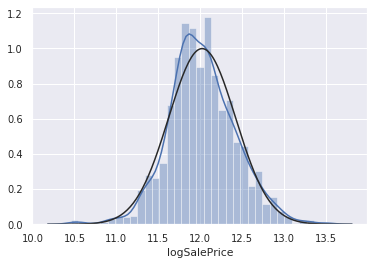

In [27]:
#Will a log transform work?
train_df['logSalePrice'] = np.log(train_df['SalePrice'])
fig = sns.distplot(train_df['logSalePrice'], fit = norm)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


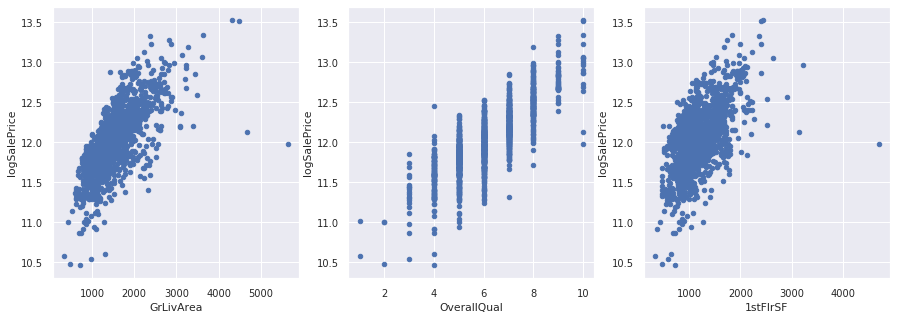

In [28]:
fig, a = plt.subplots(1,3,figsize=(15,5))
train_df.plot.scatter(x = 'GrLivArea', y='logSalePrice', ax=a[0]) 
train_df.plot.scatter(x = 'OverallQual', y='logSalePrice', ax=a[1]) 
train_df.plot.scatter(x = '1stFlrSF', y='logSalePrice', ax=a[2]) 
plt.show()

In [29]:
train_df_num = numerical_features
# # We have no use for the old columnd *SalePrice* anymore, we'll drop it
train_df_num['logSalePrice'] = train_df['logSalePrice'] 

/home/eigenstir/anaconda3/envs/pydev/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Number of outliers: LotArea    10
dtype: int64

 correlation coefficients for the 3 plots:
0.25731989235273867 	 0.39991774112559053 	 0.3948379316246293 	


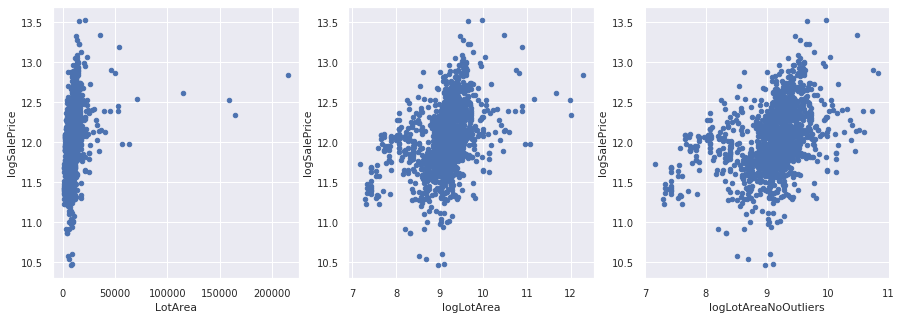

In [30]:
temp = train_df.loc[:, ['LotArea','logSalePrice']]

temp['logLotArea'] = np.log(temp['LotArea'])
fig, a = plt.subplots(1,3,figsize=(15,5))

noOutInd = (scaled_df['LotArea']<=4)
temp2 = temp.loc[noOutInd,['logSalePrice','LotArea', 'logLotArea']]
temp2.columns = ['logSalePrice', 'LotAreaNoOutliers', 'logLotAreaNoOutliers']

temp.plot.scatter(x='LotArea',y='logSalePrice', ax=a[0])
temp.plot.scatter(x='logLotArea',y='logSalePrice', ax=a[1]) #notice how the outliers are no longer outliers after log transforms
temp2.plot.scatter(x = 'logLotAreaNoOutliers', y='logSalePrice', ax=a[2])
print('Number of outliers:', scaled_df.loc[scaled_df['LotArea']>4,['LotArea']].count())
print('\n correlation coefficients for the 3 plots:')
print(np.corrcoef(temp['LotArea'],temp['logSalePrice'])[0][1],'\t',
      np.corrcoef(temp['logLotArea'],temp['logSalePrice'])[0][1],'\t',
      np.corrcoef(temp2['logLotAreaNoOutliers'],temp2['logSalePrice'])[0][1],'\t')
plt.show()

### Automated Transformations

In [31]:
# Here, we check if a column is log-able and if log transforming it improves the correlation coefficient between it and SalePrice. If it does, create a new column with the transformed variable

temp = (numerical_features.min(axis=0)>0)
logable = list(temp.loc[temp == True].index.drop(['logSalePrice', 'Id']))
print('Columns that can be log-transformed:', logable)

ycol = 'logSalePrice'
temp = pd.DataFrame(train_df[ycol], columns=[ycol])
for c in logable:
    logc = 'log'+c
    temp[c] = train_df[c]
    temp[logc] = np.log(train_df[c])
corrmat = temp.corr(method = 'pearson')

corrcoefs = [[corrmat.loc[c, ycol],corrmat.loc['log'+c, ycol]] for c in logable]
corrcoefs = pd.DataFrame(corrcoefs, index=logable, columns = ['NoTransform', 'Log'])
corrcoefs['Log - NT'] = corrcoefs['Log'] - corrcoefs['NoTransform']
corrcoefs = corrcoefs.sort_values('Log - NT', ascending=False)
corrcoefs

Columns that can be log-transformed: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'MoSold', 'YrSold', 'SalePrice']


,NoTransform,Log,Log - NT
LotArea,0.257320,0.399918,0.142598
SalePrice,0.948374,1.000000,0.051626
OverallCond,-0.036868,0.008710,0.045578
GrLivArea,0.700927,0.730255,0.029328
1stFlrSF,0.596981,0.608947,0.011966
LotFrontage,0.335292,0.345755,0.010463
TotRmsAbvGrd,0.534422,0.539261,0.004839
YrSold,-0.037263,-0.037261,0.000002
YearRemodAdd,0.565608,0.565590,-0.000018
GarageYrBlt,0.495794,0.493986,-0.001807


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


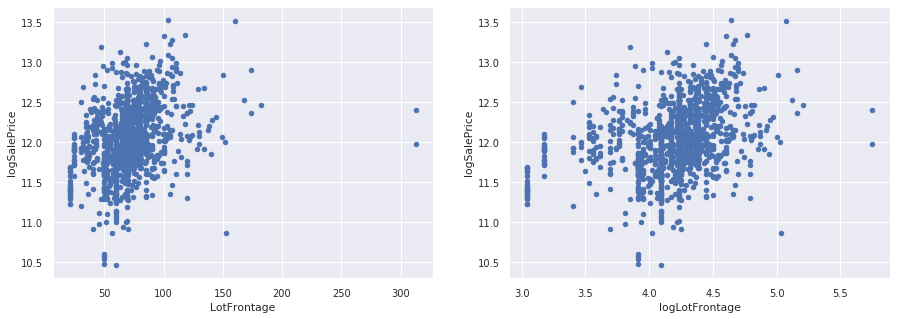

In [32]:
fig, a = plt.subplots(1,2,figsize=(15,5))
temp.plot.scatter('LotFrontage', 'logSalePrice', ax=a[0])
temp.plot.scatter('logLotFrontage', 'logSalePrice', ax=a[1])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

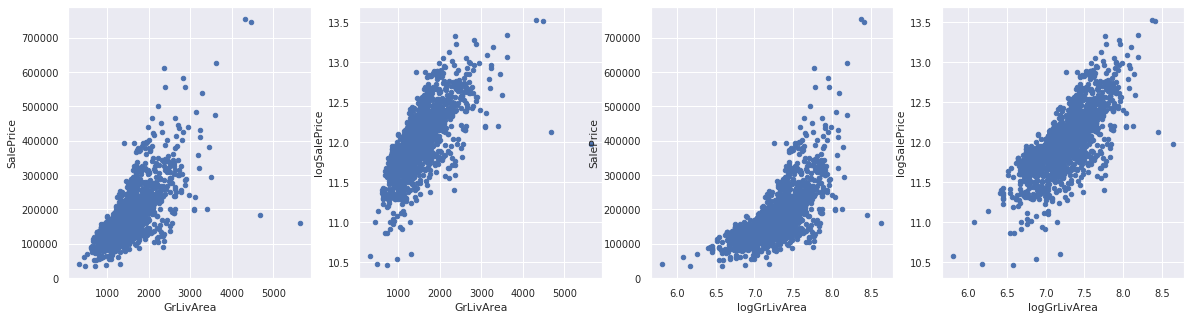

In [33]:
fig, a = plt.subplots(1,4,figsize=(20,5))
temp.plot.scatter('GrLivArea', 'SalePrice', ax=a[0])
temp.plot.scatter('GrLivArea', 'logSalePrice', ax=a[1])
temp.plot.scatter('logGrLivArea', 'SalePrice', ax=a[2])
temp.plot.scatter('logGrLivArea', 'logSalePrice', ax=a[3])
plt.show()

In [34]:
minvals = train_df_num.min(axis=0)
temp = np.logical_and(minvals > -1, minvals<= 0)
log1pable = list(temp.loc[temp == True].index)
print('Columns that can be log1p transformed:', ', '.join(log1pable),'\nCount:', len(log1pable))

Columns that can be log1p transformed: MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal 
Count: 23


/home/eigenstir/anaconda3/envs/pydev/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


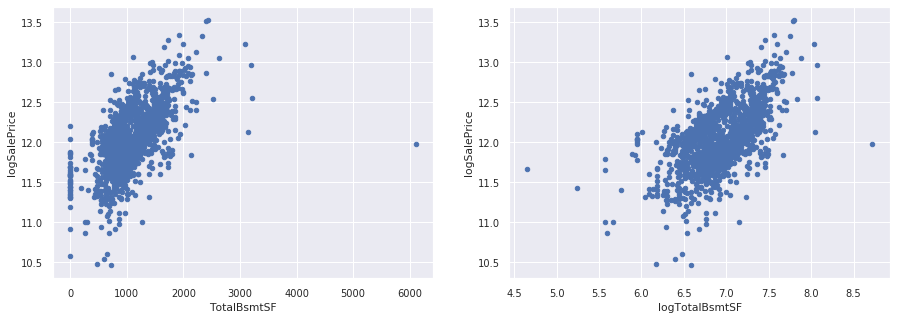

In [35]:
temp = pd.DataFrame(train_df.loc[:,['TotalBsmtSF', 'logSalePrice']])
temp['logTotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])
fig, a = plt.subplots(1,2,figsize=(15,5))
temp.plot.scatter(y='logSalePrice', x='TotalBsmtSF', ax=a[0])
temp.plot.scatter(y='logSalePrice', x='logTotalBsmtSF', ax=a[1])

plt.show()

In [36]:
print(np.corrcoef(temp['TotalBsmtSF'], temp['logSalePrice']))
booarr = np.isinf(temp['logTotalBsmtSF']) == False
print(np.corrcoef(temp.loc[booarr, 'logTotalBsmtSF'], temp.loc[booarr, 'logSalePrice']))

[[1.         0.61213398]
 [0.61213398 1.        ]]
[[1.         0.60483062]
 [0.60483062 1.        ]]
